In [1]:
numbers = list(range(1000))

def mapper(value):
    return value*2
# print(mapper(numbers))

In [2]:
def reducer(values):
    return sum(values)

In [3]:
#We can output the result of applying the map function as follows
first_step = list(map(mapper, numbers))
print(first_step)

#Next we can generate the output from the reducer and print it
result = reducer(first_step)
print (result)

# assignment

In [29]:
import pandas as pd
import numpy as np
from functools import reduce
from sklearn import preprocessing
import copy
from sklearn import naive_bayes
from sklearn.model_selection import train_test_split

# import data

In [30]:
def read_data():
    data = pd.read_csv('mushrooms.csv', delimiter=',', header=0)
    data = data[data['stalk-root'] != '?']
    return data

# clean and split data

In [45]:
data = read_data()
y = data.iloc[:,0]
X = data.iloc[:,1:]
Cn=len(np.unique(y))

n,d = X.shape

print ("initial samples: {}".format(n))
print ("number of features: {}".format(d))
print ("number of class labels: {}".format(Cn))
print ()

print ("Class Labels are: {}".format(np.unique(y)))
print ()

print ("Take a look at unique outcomes per feature")
for i in range(0,d):
	print ("{}th: {}".format(i,np.unique(X.iloc[:,i])))

print ()
print ("Remove stalk-root feature because it has some missing data")
print ("Remove veil-type feature because it is always 'p'")
X = X.drop(labels="stalk-root",axis=1)
X = X.drop(labels="veil-type",axis=1)

n,d = X.shape
# dictionary master list of unique features
featureDict = {}
for i in range(0,d):
    featureDict[i]= np.unique(X.iloc[:,i])
    print(featureDict[i])

print ()
print ("After removing the two features")
print ("number of features: {}".format(d))

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape )

n_train = len(X_train)
n_test = len(X_test)
print ()
print ("number of training samples: {}".format(n_train))
print ("number of test samples: {}".format(n_test))

# Isolate the training set based on classification label
X_train_e = X_train[y_train=='e']
X_train_p = X_train[y_train=='p']

trained_y = y_train.value_counts()

initial samples: 5644
number of features: 22
number of class labels: 2

Class Labels are: ['e' 'p']

Take a look at unique outcomes per feature
0th: ['b' 'c' 'f' 'k' 's' 'x']
1th: ['f' 'g' 's' 'y']
2th: ['b' 'c' 'e' 'g' 'n' 'p' 'w' 'y']
3th: ['f' 't']
4th: ['a' 'c' 'f' 'l' 'm' 'n' 'p']
5th: ['a' 'f']
6th: ['c' 'w']
7th: ['b' 'n']
8th: ['g' 'h' 'k' 'n' 'p' 'r' 'u' 'w' 'y']
9th: ['e' 't']
10th: ['b' 'c' 'e' 'r']
11th: ['f' 'k' 's' 'y']
12th: ['f' 'k' 's' 'y']
13th: ['b' 'c' 'g' 'n' 'p' 'w' 'y']
14th: ['b' 'c' 'g' 'n' 'p' 'w' 'y']
15th: ['p']
16th: ['w' 'y']
17th: ['n' 'o' 't']
18th: ['e' 'l' 'n' 'p']
19th: ['h' 'k' 'n' 'r' 'u' 'w']
20th: ['a' 'c' 'n' 's' 'v' 'y']
21th: ['d' 'g' 'l' 'm' 'p' 'u']

Remove stalk-root feature because it has some missing data
Remove veil-type feature because it is always 'p'
['b' 'c' 'f' 'k' 's' 'x']
['f' 'g' 's' 'y']
['b' 'c' 'e' 'g' 'n' 'p' 'w' 'y']
['f' 't']
['a' 'c' 'f' 'l' 'm' 'n' 'p']
['a' 'f']
['c' 'w']
['b' 'n']
['g' 'h' 'k' 'n' 'p' 'r' 'u' 'w' 'y']
['

#### I'm not familiar with python, I try to split each column,calculate the number of each attribute (mapper), and calculate each possibility (reducer)
####  however the loop (for each column ) like a word count to count each attrr has some problem.

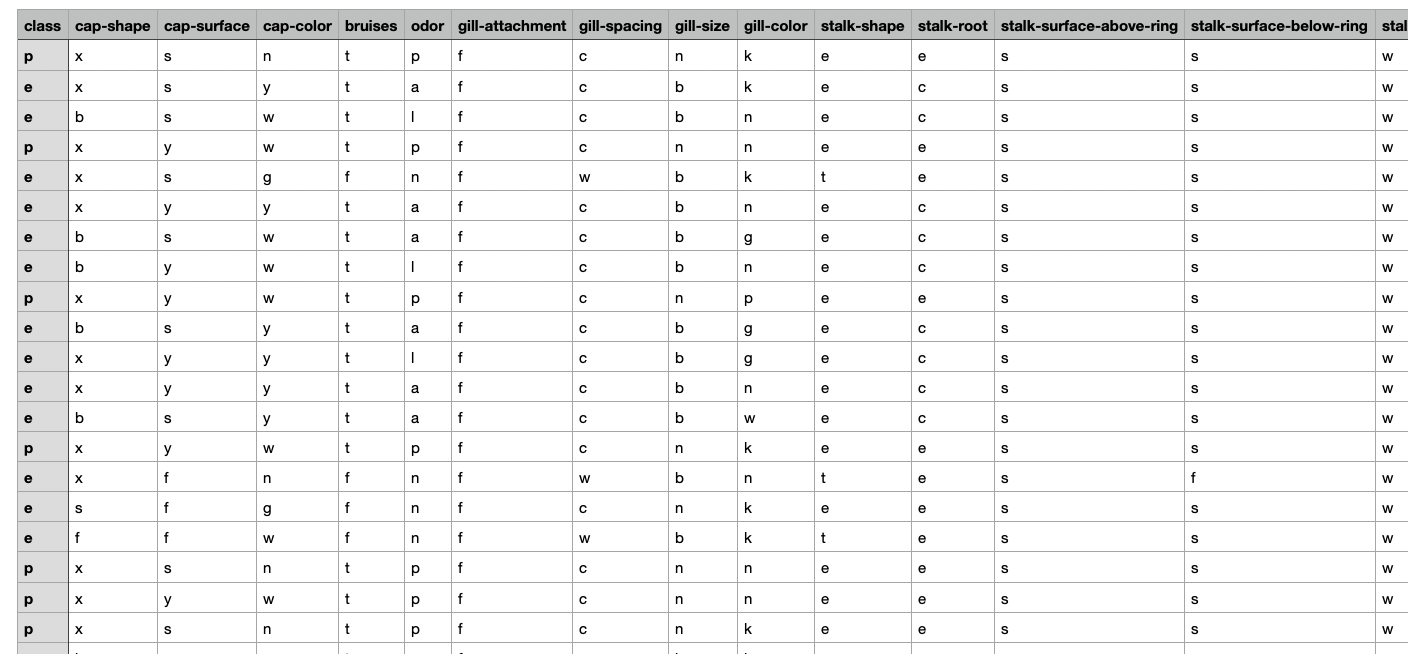

# MapReduce
### Please do not run parallel version when testing MapReduce version

In [46]:
#count number of each attribute
def mapper(X_train_tmp):
    dataList = list(np.unique(X_train_tmp))
# for each attribute calculate the total number
# eg [a,s,k,s] each feature has a list of attr
# some attrs donot exit
#     print(dataList)
# Mapper caluate  the number , similar to word count if attr == list[attrs] count++
    res = {}
#     print(dataList)
#     dataList[t,s,r...]
    for attr in dataList:
        res[attr] = X_train_tmp.isin([attr]).sum()
    return pd.Series(res)


###### reducer this method is to caluate the probability  only calculate the training set
###### both function can be used , I try to pass in more parameters in reducer, but always error, so I split the same ,in java I can know whether the front row is P or E according to the parameters I passed in, but I think there should be a similar way for Python

In [47]:
#Calculate P(X=x|Y=y) 
#Calculate the independent probability of the training set

def reducer(res,dataset):
#     print(dataset[0]) # all attrs 20 
    attrValue = dataset[1][dataset[1].notnull()] /trained_y["e"]
#     print( dataset)
    res[dataset[0]] = attrValue
    return res

def reducer2(res,dataset):
    attrValue = dataset[1][dataset[1].notnull()] /trained_y["p"]
    res[dataset[0]] = attrValue
    return res

In [48]:
# def pAndEProbablity():
#     count1 = 0
#     count2 = 0
#     for item in y_train:
#         if(item == "p"):
#              count1= count1+1
#         else:
#             count2 = count2+1
#     ratio_P = count1/(count1+count2)
#     ratio_E = count2/(count1+count2)  
#     res = {}
#     res[0] = ratio_P
#     res[1] = ratio_E
# #     print (ratio_P)
# #     print (ratio_E)
#     return pd.Series(res)
    

def MapReduce(data,type_set):
    f1 = []
    if(type_set=="e"):
#         for i in range(0,d):
#             f1[i] = reduce(reducer,map(mapper, data.iloc[:,i]))
        res = reduce(reducer,data.apply(mapper, axis=0).items(),{})
            
        return pd.DataFrame(res)
    else:
        res = reduce(reducer2,data.apply(mapper, axis=0).items(),{})
    return pd.DataFrame(res)

In [49]:
trained_E = MapReduce(X_train_e,"e")
trained_P = MapReduce(X_train_p,"p")

# pro_E_P = pAndEProbablity()
# print(trained_y)
# print(pro_E_P)
trained_E.loc["r"] = 1
trained_P.loc["r"] = 1

###### here , all the probability of each feature are calucated by reducer ix , some attr is NaN ,means no this attr for current feature

In [50]:
trained_E.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
a,NaN,NaN,NaN,NaN,0.114754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.109798,NaN
b,0.075486,NaN,NaN,NaN,NaN,NaN,NaN,0.929851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c,NaN,NaN,0.008769,NaN,NaN,NaN,0.737705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.528784
e,NaN,NaN,0.166603,NaN,NaN,NaN,NaN,NaN,NaN,0.253908,NaN,NaN,NaN,NaN,NaN,NaN,0.233321,NaN,NaN,NaN


In [51]:
trained_P.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
a,NaN,NaN,NaN,NaN,NaN,0.008075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b,0.018634,NaN,0.055280,NaN,NaN,NaN,NaN,0.782609,NaN,NaN,NaN,NaN,0.207453,0.201863,NaN,NaN,NaN,NaN,NaN,NaN
c,0.002484,NaN,0.006211,NaN,0.08882,NaN,0.945963,NaN,NaN,NaN,NaN,NaN,0.017391,0.017391,NaN,NaN,NaN,NaN,0.026087,NaN
d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.314907
e,NaN,NaN,0.006211,NaN,NaN,NaN,NaN,NaN,NaN,0.874534,NaN,NaN,NaN,NaN,NaN,NaN,0.004348,NaN,NaN,NaN


# parallel version

### Please do not run the version of MapReduce when testing the parallel version!!

In [38]:
from itertools import islice
import multiprocessing

class ParallelMapReduce(object):
    def __init__(self, map_func, reduce_func, num_workers=None):
        self.num_workers = num_workers
        self.mapper_run = map_func
        self.reduce_run = reduce_func
        self.pool = multiprocessing.Pool(num_workers)

    def partition(self, n, iterable):
        i = iter(iterable)
        piece = list(islice(i, n))
        while piece:
            yield piece
            piece = list(islice(i, n))

    def mapper(data):
         result = data.apply(mapper,axis=0)
         return result

    def reducer(data):
         result = reduce(reduce, data.items(),{})
         return result

    def get_result(data):
        results = pd.DataFrame(data[0])
        for item in range(1, len(data)):
            results = pd.concat([results,pd.DataFrame(data[item])],axis=1)
        return results
 
    def __call__(self, inputs):
        test = pd.Series(np.array_split(inputs,self.num_workers,axis = 1))
        values = self.pool.map(mapper_run,test)
        values = pd.concat(values,axis=1)
        values = np.array_split(values,self.num_workers,axis=1)
        values = self.pool.map(reduce_run,values)
        values = get_result(values)
        
        
        return self.reduce_run(values)

In [39]:
# numbers = range(1000)

# def mapper(value):
#     return value*2

# def reducer(values):
#     return sum(values)


######### test  parallel version!!!!!!!!!!!!!!!!!#######


# mapreduce = ParallelMapReduce(mapper, reducer, 10)
# trained_E = MapReduce(X_train_e,"e")
# trained_P = MapReduce(X_train_p,"p")
# trained_E.loc["r"] = 1
# trained_P.loc["r"] = 1


# print (mapreduce)

###### 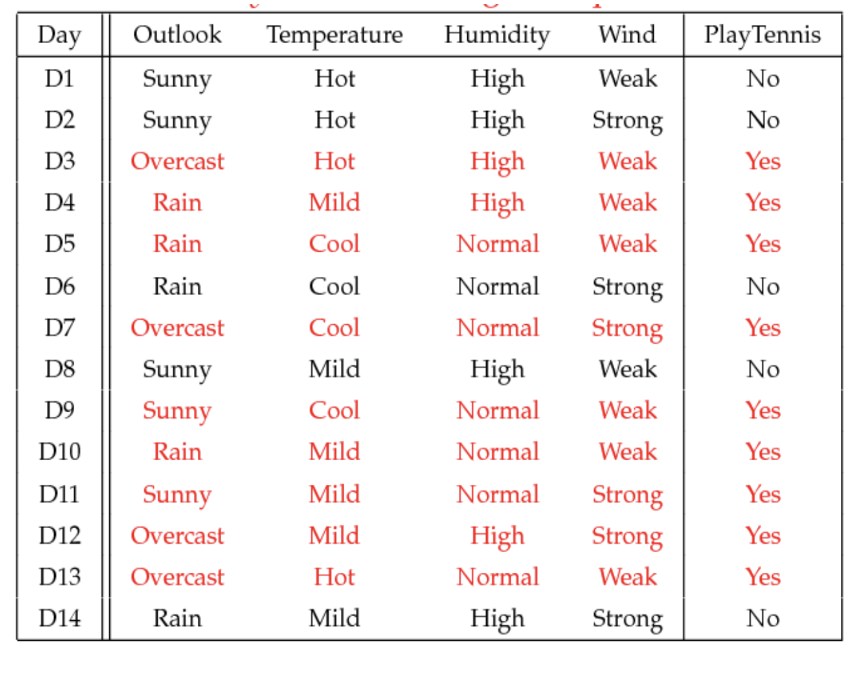

###### 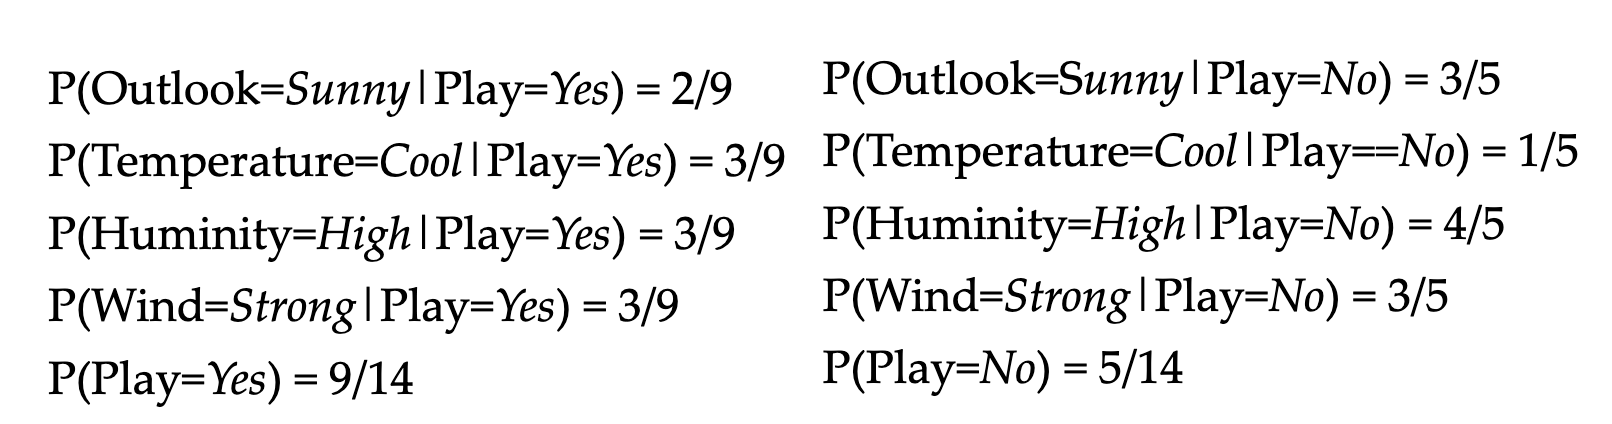

# Native bayes Classifier

#### P(e｜x1,x2,x3 ) = P(x1|e) * P(x2|e) * P(x3|e) * P(e)

In [52]:
#Calculate P(Y=y) for all possible y
def calculate_prior(train):
    return train / len(y_train)

# print(calculate_prior(trained_y["e"]))
# print(calculate_prior(trained_y["p"]))

# P(X=x1|Y=y)P(X=x2|Y=y)...P(X=xn|Y=y) * P(Y=y) for all y and find the maximum
# some attrbutes do not two probability so it 0
def naive_bayes(dataset,target,ratioList):
    probAll = 0.0 
    if(target == "e"):
        probAll = calculate_prior(trained_y["e"])
    else:
        probAll = calculate_prior(trained_y["p"])
    res = 1
    for item in dataset.items():
        res = res * ratioList[item[0]].loc[item[1]]
    res = probAll * res
    if np.isnan(res):
        return 0
    return res

def calculate_correct(index):
    return y_test.iloc[index]

In [53]:
# y_test.head(10)
# for i in range(len(y_test)):
#     print(y_test.iloc[i])

In [54]:

def test(data_test,i):
    probP = naive_bayes(data_test,"p",trained_P)
    probE = naive_bayes(data_test,"e",trained_E)
    if(probP > probE):
        return 1
    else:
        return 0

In [55]:
# test(X_test.iloc[4,:])
# len(y_test)

In [56]:
# X_test.apply(test,axis=1)
proTestE = 0
proTestP = 0
y_test_pred = 0
for i in range(len(X_test)):
    date_test = X_test.iloc[i,:]
    res = test(date_test, i )
    if( res==1 ):
        proTestP = proTestP + 1
    else: 
        proTestE = proTestE + 1
    correct = calculate_correct(i)
    if(correct=="p" and res == 1) or (correct=="e" and res == 0) :
        y_test_pred = y_test_pred + 1
# print(y_test_pred)


In [57]:
# some helper code that may be useful for performance evaluation on the test set
print ()
print ("Probability of correct prediction")
pro = (y_test_pred)/len(y_test) 
print ((y_test_pred)/len(y_test))
print ()
print('{:.2%} '.format(pro))



Probability of correct prediction
0.9900779588944011

99.01% 
